In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [2]:
df = pd.read_csv('/content/drive/MyDrive/IST347/Week_12/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [7]:
X_train.shape

(242, 13)

In [8]:
scaler= StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Categorial_ANN

In [9]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [10]:
# initiate Sequential
nn_model = Sequential()

#create two hidden layers with 8 neuron
nn_model.add(Dense(13, activation='relu'))
nn_model.add(Dense(13, activation='relu'))

# create output layer
nn_model.add(Dense(1, activation='sigmoid'))

#compile this model
nn_model.compile(optimizer='adam', loss ='binary_crossentropy', metrics =['accuracy'])

In [11]:
nn_model.fit(scaled_X_train, y_train, batch_size=32, epochs=200, validation_data=(scaled_X_test, y_test))

Epoch 1/200
8/8 [==============================] - 1s 83ms/step - loss: 0.6261 - accuracy: 0.7701 - val_loss: 0.6305 - val_accuracy: 0.7377
Epoch 2/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6084 - accuracy: 0.7651 - val_loss: 0.6118 - val_accuracy: 0.7705
Epoch 3/200
8/8 [==============================] - 0s 9ms/step - loss: 0.5893 - accuracy: 0.8103 - val_loss: 0.5927 - val_accuracy: 0.8197
Epoch 4/200
8/8 [==============================] - 0s 11ms/step - loss: 0.5775 - accuracy: 0.7950 - val_loss: 0.5731 - val_accuracy: 0.8197
Epoch 5/200
8/8 [==============================] - 0s 9ms/step - loss: 0.5528 - accuracy: 0.7986 - val_loss: 0.5540 - val_accuracy: 0.8197
Epoch 6/200
8/8 [==============================] - 0s 10ms/step - loss: 0.5423 - accuracy: 0.7793 - val_loss: 0.5350 - val_accuracy: 0.8197
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 0.5138 - accuracy: 0.8217 - val_loss: 0.5160 - val_accuracy: 0.8525
Epoch 8/200
8/8 [=======

In [12]:
loss_df = pd.DataFrame(nn_model.history.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.627087,0.760331,0.630514,0.737705
1,0.607380,0.785124,0.611847,0.770492
2,0.588452,0.801653,0.592733,0.819672
3,0.568389,0.805785,0.573148,0.819672
4,0.549286,0.801653,0.553987,0.819672
...,...,...,...,...
195,0.104432,0.983471,0.627022,0.885246
196,0.103481,0.983471,0.630572,0.885246
197,0.102685,0.987603,0.634576,0.885246
198,0.101758,0.987603,0.632698,0.885246


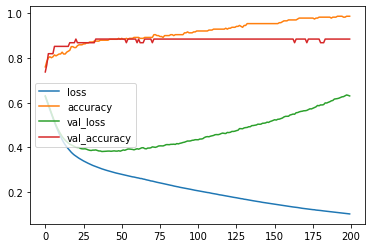

In [13]:
loss_df.plot()

In [14]:
y_pred = nn_model.predict(scaled_X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[26  3]
 [ 4 28]]


0.8852459016393442

In [16]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 14        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________


Stop when there's an overfitting issue

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=30)

In [19]:
# initiate Sequential
nn_model_2 = Sequential()

#create two hidden layers with 8 neuron
nn_model_2.add(Dense(13, activation='relu'))
nn_model_2.add(Dense(13, activation='relu'))

# create output layer
nn_model_2.add(Dense(1, activation='sigmoid'))

#compile this model
nn_model_2.compile(optimizer='adam', loss ='binary_crossentropy', metrics =['accuracy'])

In [20]:
nn_model_2.fit(scaled_X_train, y_train, batch_size=32, epochs=200, validation_data=(scaled_X_test, y_test), callbacks=[early_stop])

Epoch 1/200
8/8 [==============================] - 1s 32ms/step - loss: 0.7521 - accuracy: 0.3744 - val_loss: 0.7113 - val_accuracy: 0.4426
Epoch 2/200
8/8 [==============================] - 0s 8ms/step - loss: 0.7414 - accuracy: 0.3891 - val_loss: 0.6958 - val_accuracy: 0.5082
Epoch 3/200
8/8 [==============================] - 0s 9ms/step - loss: 0.7274 - accuracy: 0.4631 - val_loss: 0.6831 - val_accuracy: 0.5738
Epoch 4/200
8/8 [==============================] - 0s 9ms/step - loss: 0.6982 - accuracy: 0.4782 - val_loss: 0.6721 - val_accuracy: 0.5902
Epoch 5/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6978 - accuracy: 0.5489 - val_loss: 0.6618 - val_accuracy: 0.6393
Epoch 6/200
8/8 [==============================] - 0s 7ms/step - loss: 0.6858 - accuracy: 0.5834 - val_loss: 0.6516 - val_accuracy: 0.6557
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6597 - accuracy: 0.6246 - val_loss: 0.6413 - val_accuracy: 0.6557
Epoch 8/200
8/8 [=========

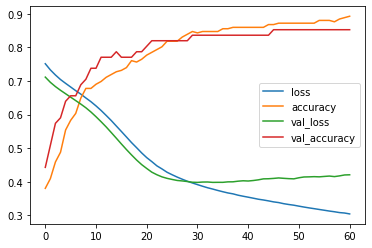

In [21]:
loss_df_2 = pd.DataFrame(nn_model_2.history.history)
loss_df_2.plot()

In [22]:
from tensorflow.keras.layers import Dropout

In [23]:
# initiate Sequential
nn_model_3 = Sequential()

#create two hidden layers with 8 neuron
#add drop out some of neurons // will switch off
nn_model_3.add(Dense(13, activation='relu'))
nn_model_3.add(Dropout(0.2))
nn_model_3.add(Dense(13, activation='relu'))
nn_model_3.add(Dropout(0.2))


# create output layer
nn_model_3.add(Dense(1, activation='sigmoid'))

#compile this model
nn_model_3.compile(optimizer='adam', loss ='binary_crossentropy', metrics =['accuracy'])

In [24]:
nn_model_3.fit(scaled_X_train, y_train, batch_size=32, epochs=200, validation_data=(scaled_X_test, y_test), callbacks=[early_stop])

Epoch 1/200
8/8 [==============================] - 1s 33ms/step - loss: 0.6977 - accuracy: 0.5127 - val_loss: 0.7134 - val_accuracy: 0.4590
Epoch 2/200
8/8 [==============================] - 0s 8ms/step - loss: 0.7015 - accuracy: 0.5342 - val_loss: 0.7010 - val_accuracy: 0.4918
Epoch 3/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6891 - accuracy: 0.4813 - val_loss: 0.6911 - val_accuracy: 0.4918
Epoch 4/200
8/8 [==============================] - 0s 7ms/step - loss: 0.6933 - accuracy: 0.5368 - val_loss: 0.6820 - val_accuracy: 0.5410
Epoch 5/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6974 - accuracy: 0.5286 - val_loss: 0.6739 - val_accuracy: 0.4918
Epoch 6/200
8/8 [==============================] - 0s 9ms/step - loss: 0.6516 - accuracy: 0.5857 - val_loss: 0.6668 - val_accuracy: 0.5082
Epoch 7/200
8/8 [==============================] - 0s 9ms/step - loss: 0.6548 - accuracy: 0.6329 - val_loss: 0.6584 - val_accuracy: 0.5246
Epoch 8/200
8/8 [=========

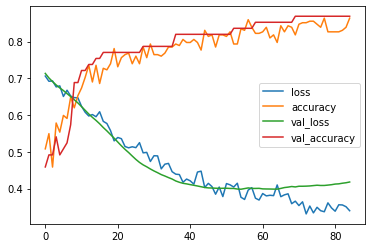

In [25]:
loss_df_3 = pd.DataFrame(nn_model_3.history.history)
loss_df_3.plot()

In [26]:
y_pred_3 = nn_model_3.predict(scaled_X_test)
y_pred_3 = (y_pred_3 > 0.5)
cm3 = confusion_matrix(y_test, y_pred_3)
print(cm3)
accuracy_score(y_test, y_pred_3)

[[26  3]
 [ 5 27]]


0.8688524590163934